In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.shape

(10000, 11)

In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X_train.shape

(8000, 11)

In [15]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model=Sequential()
#1 input layer 1 output layer 1 hidden layer hidden layer has 3 perceptron

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))#hidden layer
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.7972 - val_loss: 0.4993 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7972 - val_loss: 0.4824 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4693 - accuracy: 0.7972 - val_loss: 0.4599 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.7972 - val_loss: 0.4432 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.7972 - val_loss: 0.4346 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8037 - val_loss: 0.4301 - val_accuracy: 0.8087
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8111 - val_loss: 0.4280 - val_accuracy: 0.8106

In [22]:
#hidden layer
model.layers[0].get_weights()

[array([[-1.14559509e-01, -2.13908106e-01,  1.99045151e-01,
          2.76469551e-02,  2.14987360e-02,  1.25082761e-01,
          2.03750268e-01, -3.18933398e-01,  2.04979196e-01,
         -3.41965929e-02, -2.42986828e-01],
        [ 1.59710383e+00,  2.54772615e+00,  2.05725741e+00,
         -7.84957349e-01, -1.68012941e+00,  5.58674894e-02,
         -2.91241676e-01,  2.12137192e-01, -1.76841903e+00,
         -1.20893323e+00,  1.99613452e-01],
        [ 2.18737781e-01, -1.47874683e-01, -5.91889024e-01,
         -1.25251651e-01, -2.11567983e-01,  2.11648285e-01,
          1.34415045e-01, -2.54873842e-01, -4.10295069e-01,
         -8.19293857e-02, -7.18002766e-02],
        [-1.23334634e+00,  1.87747642e-01,  7.64346719e-02,
         -6.67057216e-01, -5.45866229e-02,  4.12251800e-02,
          5.67149341e-01,  1.02898162e-02,  1.96614504e-01,
         -1.12633288e-01,  2.16240454e+00],
        [ 2.07322448e-01,  6.09574765e-02,  6.25475705e-01,
         -3.50846028e+00, -5.65218270e-01, -

In [23]:
#output layer
model.layers[1].get_weights()

[array([[-0.09386639, -0.62636316,  0.5334015 ,  0.2586567 ,  0.3444382 ,
          0.12705304, -0.290348  , -0.13308577,  0.26391852, -0.10815253,
         -0.08629648],
        [-0.31824747, -0.93316036,  0.3552728 ,  0.6648323 , -0.40050864,
         -0.12354212, -0.7761157 , -0.08986887, -1.2512587 , -0.7081153 ,
         -0.47309113],
        [-0.59020275, -0.14218   ,  0.12696196,  0.44575843, -0.80398184,
         -0.5481035 , -0.43924007, -0.40780106, -0.1108389 , -0.75124156,
         -0.7365391 ],
        [-2.2896836 , -1.5429642 ,  1.7215889 ,  2.171747  , -2.3569026 ,
         -2.5185306 , -1.9234787 , -2.7563543 , -1.980286  , -1.506873  ,
         -1.3021412 ],
        [ 0.07600645,  0.9475183 , -0.11859989, -0.81051755,  0.14895177,
          0.34753418,  0.32847178, -0.22819772,  0.9887908 ,  0.40119427,
         -0.00915245],
        [ 1.0534418 ,  0.6502687 , -0.75233287, -0.5596863 ,  0.8312489 ,
          1.030041  ,  0.35974637,  1.1840527 ,  0.28666404,  0.5669448

In [24]:
y_ans=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [25]:
y_pred=np.where(y_ans>0.5,1,0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

In [27]:
import matplotlib.pyplot as plt

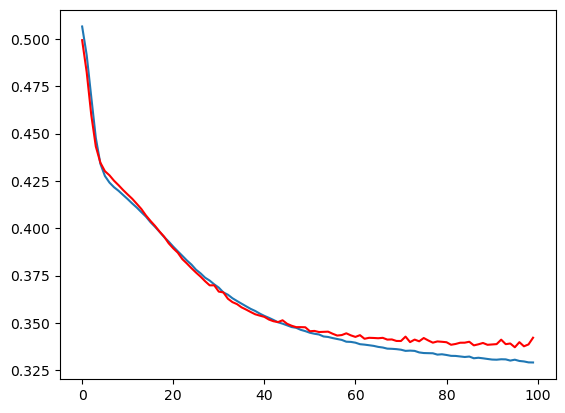

In [28]:
# how our training loss is decreasing
plt.plot(history.history['loss'])
#how our validation loss is decreasing
plt.plot(history.history['val_loss'],c='r')

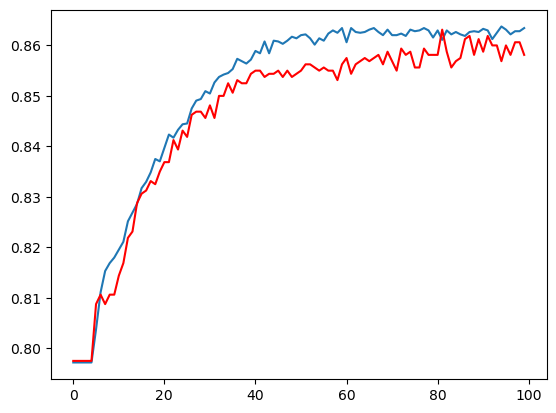

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],c='r')